Question No 2 Solution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import math

part (a)
"A" matrix generation:-
i used vectorized implementation to produce matrix A (without the for loops).
Numpy operations are way more faster than for loops

In [60]:

def A_matrix_producer(M, B, S):
	
	m = np.linspace(1,M,M).reshape(M,1)
	t = (m-1)/(M-1)
	print(t.shape)
	BS=B*S
	print("BSSSSSSSSSSSSSSS",BS)
	k= np.linspace(-BS, BS,2*BS+1).reshape(2*BS+1,1).T
	print("K.shapeeeeeeeeeeeeeeeeeeeeeeeeeeee",k)
	#vectorized implementation to generate matrix A
	A = np.exp(np.dot(t, k/S)*2*pi*1j)
	print("A matrix shape: ",A.shape)
	return A


In [55]:
print(np.linspace(-48,48))

[-48.         -46.04081633 -44.08163265 -42.12244898 -40.16326531
 -38.20408163 -36.24489796 -34.28571429 -32.32653061 -30.36734694
 -28.40816327 -26.44897959 -24.48979592 -22.53061224 -20.57142857
 -18.6122449  -16.65306122 -14.69387755 -12.73469388 -10.7755102
  -8.81632653  -6.85714286  -4.89795918  -2.93877551  -0.97959184
   0.97959184   2.93877551   4.89795918   6.85714286   8.81632653
  10.7755102   12.73469388  14.69387755  16.65306122  18.6122449
  20.57142857  22.53061224  24.48979592  26.44897959  28.40816327
  30.36734694  32.32653061  34.28571429  36.24489796  38.20408163
  40.16326531  42.12244898  44.08163265  46.04081633  48.        ]


part(b) generating the function g(t) = cos(2π^2t)

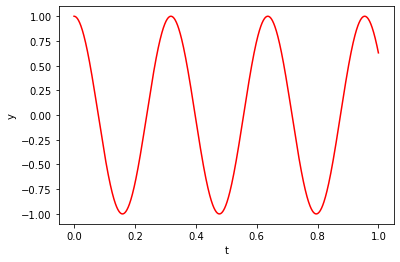

In [49]:
M=1024
m = np.linspace(1,M,M)
t = (m-1)/(M-1) 
Y = np.cos(2*(pi**2)*t).reshape(M,1)
plt.plot(t,Y,'r')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

(1024, 1)
BSSSSSSSSSSSSSSS 48
K.shapeeeeeeeeeeeeeeeeeeeeeeeeeeee [[-48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37. -36. -35.
  -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22. -21.
  -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
   -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
    8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
   22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.
   36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.]]
A matrix shape:  (1024, 97)
(1024, 97)


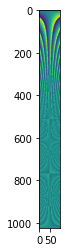

In [61]:

A = A_matrix_producer(M, 16, 3)    #M=1024 defined in cell above
plt.imshow(np.angle(A))
print(A.shape)


Computing SVD of A

)))))))) [[5.53985559e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.53985559e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.53985559e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.49455014e-14
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.46828811e-14 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.17656428e-14]]
(97, 97)


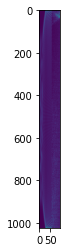

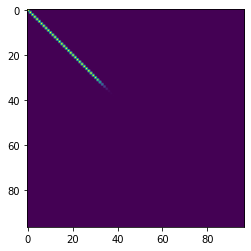

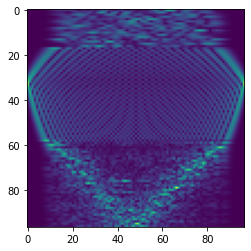

In [62]:
U, S_ecn, Vh = np.linalg.svd(A, full_matrices=False)
#converting 1D S to diagonal 2D sigma matrix
S_ecn = np.diag(S_ecn)
print("))))))))",S_ecn)
Z = np.zeros(((U.shape[0]-S_ecn.shape[0]),S_ecn.shape[1]))

S = S_ecn # np.vstack((S_ecn,Z))
#print(S)
#print(U)
plt.imshow(abs(U))
plt.figure()
plt.imshow(abs(S))
plt.figure()
plt.imshow(abs(Vh))
print(Vh.shape)
# numpy SVD function returns the V matrtix as its conjugate transpose (Hermitian) 
#so we need to convert this to V by taking conjugate transpose
V = Vh.T.conj()
A_reconstruct = np.dot(np.dot(U,S),Vh) 
#S is not square so we take psudo inverse of S
#Sinv = np.dot(np.linalg.inv(np.dot(S.T,S)),S.T)
#print("Sinvshape",Sinv.shape)
alpha_hat = np.dot(np.dot(np.dot(V,np.linalg.inv(S)),U.T.conj()),Y)  # V S inv Uh

y_pred_clean= np.dot(A_reconstruct, alpha_hat)


c:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


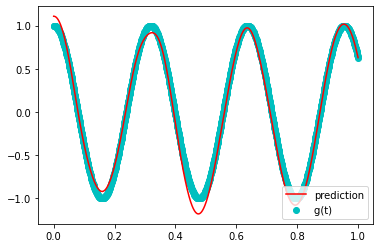

In [63]:
plt.plot(t,y_pred_clean, color = 'r')
plt.scatter(t,Y, color = 'c')
plt.legend(["prediction", "g(t) "], loc ="lower right")
plt.show()

1.0339760299764802


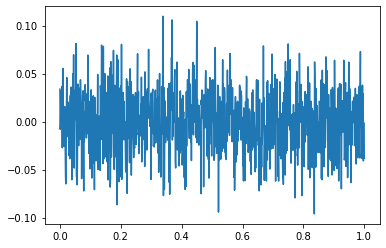

In [64]:
noise = np.random.normal(0,1,M).reshape(M,1)*0.031099
plt.plot(t, noise)
print(np.linalg.norm(noise))

In [65]:
def randomvector(n):
    components = [np.random.normal() for i in range(n)]
    r = math.sqrt(sum(x*x for x in components))
    v = [x/r for x in components]
    return v

noise = np.asfarray(randomvector(M)).reshape(M,1)
print(noise.shape)
print(np.linalg.norm(noise))





(1024, 1)
1.0


(1024, 1)
(1024, 1)
(1024, 1)


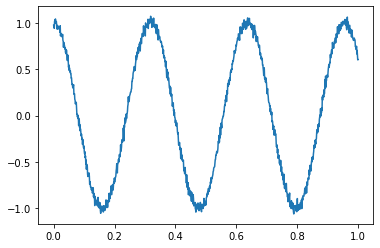

In [66]:
y_noisy = np.sum((Y,  noise),axis=0)
print(noise.shape)
print(Y.shape)
print(y_noisy.shape)
plt.plot(t, y_noisy)

(1622884136284.6716-98398409469.53778j)


c:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


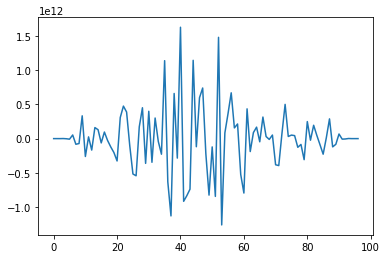

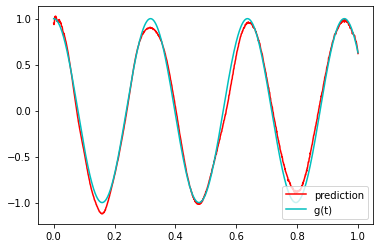

In [68]:

alpha_hat_noisy =  np.dot(np.dot(np.dot(V,np.linalg.inv(S)),U.T.conj()),y_noisy)  # V S inv Uh
print(np.amax( np.dot(np.dot(np.dot(V, np.linalg.inv(S)),U.T.conj()),noise)))
plt.plot(alpha_hat_noisy)
y_pred2= np.dot(A_reconstruct, alpha_hat_noisy)
plt.figure()
plt.plot(t,y_pred2, color = 'r')
plt.plot(t,Y, color = 'c')
plt.legend(["prediction", "g(t) "], loc ="lower right")
plt.show()